# PANDAS PROYECTO FINAL (ANALISIS DE DATOS)
GRUPO #2
- Carlos Renaldo Taracena Coronado - 202325518
- Andres Hernandez Maldonado - 202325502

1. - Datos del proyecto hasta fecha 11/01/2023 de todas las mediciones que siguieron (parcial o totalmente) el formato para implementacion en la base de datos

2. Importacion de Librerias (Pandas as pd, folium as flm, & matplotlib as plt)

In [19]:
import pandas as pd 
import folium as flm
import matplotlib.pyplot as plt
import csv

3. Carga del Conjunto de Datos utilizados para presentacion de datos

In [18]:
data_umes_2023 = pd.read_csv('datos_proyecto_UMES_2023.csv')

In [4]:
data_umes_2023.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12619 entries, 0 to 12618
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IoT                  12619 non-null  object 
 1   Fecha                12619 non-null  object 
 2   Hora                 12619 non-null  object 
 3   Temperatura          12619 non-null  float64
 4   Humedad              12619 non-null  object 
 5   Presion_Atmosferica  12604 non-null  float64
 6   Intensidad_Luz       12619 non-null  object 
 7   Viento               12577 non-null  object 
 8   UV                   1222 non-null   float64
dtypes: float64(3), object(6)
memory usage: 887.4+ KB


- IoT: Nombre de la Estacion y Parte de la Ubicacion de la misma
- Fecha: Fecha de la medicicion realizada por nuestro Arduino ESP32
- Hora: Hora de la lectura tomada
- Temperatura: Temperatura medida
- Humedad: Humedad medida
- Presion Armosfericaa: Presion medida
- Intensidad de Luz: Intensidad de luz (altificial/natural)
- Viento: Velocidad del viento (m/s)
- UV: Indice de Rayos ultravioleta

In [5]:
data_umes_2023.describe()

,Temperatura,Presion_Atmosferica,UV
count,12619.000000,12604.000000,1222.000000
mean,23.859095,14361.046436,0.008183
std,2.074697,30972.432062,0.286065
min,16.000000,791.630600,0.000000
25%,23.000000,899.880000,0.000000
50%,24.960000,900.030000,0.000000
75%,25.040000,900.180000,0.000000
max,29.000000,86250.160000,10.000000


In [6]:
data_umes_2023.head(10) #muestra de las primeras 10 posiciones de nuestra lista de datos

,IoT,Fecha,Hora,Temperatura,Humedad,Presion_Atmosferica,Intensidad_Luz,Viento,UV
0,4_7CL,27/10/2023,08:36:02 PM,21.0,76,85227.07,0,NaN,0.0
1,4_7CL,27/10/2023,08:41:10 PM,21.0,76,85221.52,0,NaN,0.0
2,4_7CL,27/10/2023,08:46:19 PM,21.0,76,85231.13,0,NaN,0.0
3,4_7CL,27/10/2023,08:51:28 PM,21.0,78,85228.53,0,NaN,0.0
4,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:15:04,28.0,53,1030.00,1156,10,10.0
5,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:20:54,29.0,53,1001.00,1135,10,0.0
6,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:26:37,29.0,53,1030.00,1265,12,0.0
7,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:32:20,29.0,53,1003.00,1081,10,0.0
8,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:38:03,29.0,53,1022.00,1240,11,0.0
9,Estacion_2_Villa_Nueva_Zona_12,27/10/2023,21:43:46,29.0,53,1020.00,1295,13,0.0


5. Primer Analisis de datos

Vemos algunas de las mediciones en la fecha del 29 de octubre del presente año que tengan una humedad del aire mayor al 60%

In [16]:
display(data_umes_2023.loc[(data_umes_2023['Fecha']=='11/02/2023') & (data_umes_2023['IoT']=="E1_CAP_13")]) 

,IoT,Fecha,Hora,Temperatura,Humedad,Presion_Atmosferica,Intensidad_Luz,Viento,UV
9797,E1_CAP_13,11/02/2023,07:56:07,21.71,66.0,86182.70,0.0,-,NaN
9798,E1_CAP_13,11/02/2023,08:01:25,21.71,66.0,86186.06,0.0,-,NaN
9799,E1_CAP_13,11/02/2023,08:06:38,21.70,66.0,86220.09,0.0,-,NaN
9803,E1_CAP_13,11/02/2023,08:11:50,21.63,67.0,86205.23,0.0,-,NaN
9804,E1_CAP_13,11/02/2023,08:17:02,21.58,68.0,86213.44,0.0,-,NaN
9805,E1_CAP_13,11/02/2023,08:22:15,21.53,68.0,86208.69,0.0,-,NaN
9809,E1_CAP_13,11/02/2023,08:27:28,21.50,68.0,86202.95,0.0,-,NaN
9810,E1_CAP_13,11/02/2023,08:32:45,21.49,68.0,86207.32,0.0,-,NaN
9811,E1_CAP_13,11/02/2023,08:37:58,21.52,68.0,86221.20,0.0,-,NaN
9812,E1_CAP_13,11/02/2023,09:04:11,21.53,68.0,86250.16,0.0,-,NaN


In [8]:
ord_date = data_umes_2023.sort_values(['Fecha'],ascending=(1))
ord_date

,IoT,Fecha,Hora,Temperatura,Humedad,Presion_Atmosferica,Intensidad_Luz,Viento,UV
500,4_7CL,01/01/2000,00:00:21,22.0,74.0,849.0342,1353,0.0,NaN
413,4_7CL,01/01/2000,00:00:05,22.0,77.0,849.4850,0,0.0,NaN
412,4_7CL,01/01/2000,00:00:07,22.0,77.0,849.5778,0,0.0,NaN
496,4_7CL,01/01/2000,00:00:05,22.0,74.0,849.0028,991,0.0,NaN
498,4_7CL,01/01/2000,00:00:13,22.0,74.0,849.1458,1203,0.0,NaN
...,...,...,...,...,...,...,...,...,...
421,4_7CL,29/10/2023,01:53:41 PM,22.0,77,849.3810,0,NaN,NaN
422,4_7CL,29/10/2023,01:53:50 PM,22.0,77,849.4122,0,NaN,NaN
423,4_7CL,29/10/2023,01:53:58 PM,22.0,77,849.5058,0,NaN,NaN
425,4_7CL,29/10/2023,01:54:15 PM,22.0,77,849.3894,0,NaN,NaN


6. Analisis de Datos:
- Utilizando "mean()", calculo del promedio/mediana de la Tmeperatura del dia a dia
7. Analisis de Datos:
- Utilizado "groupby()" and "mean()", "median()"

In [9]:
dategroupumes = data_umes_2023.groupby('IoT') 
meandategroupumes = dategroupumes['Temperatura'].mean() 
display(meandategroupumes) 

IoT
1_13SF                            24.708095
4_7CL                             21.902256
7_10MIX                           22.704255
E11_CAP_1                         19.954717
E12_MIX_8                         20.564367
E1_CAP_13                         22.371087
E3_MIX_08                         17.000000
E4_CAP_07                         24.334820
E7_MIX_10                         24.801342
E8_CAP_08                         21.000000
E9_CAP_12                         20.000000
Estacion_2_Villa_Nueva_Zona_12    25.767642
Name: Temperatura, dtype: float64

In [10]:
mediandategroupumes = dategroupumes['Temperatura'].median()
display(mediandategroupumes) #muestra los datos que mantienen el promedio "medio"

IoT
1_13SF                            24.87
4_7CL                             22.00
7_10MIX                           22.70
E11_CAP_1                         20.00
E12_MIX_8                         21.00
E1_CAP_13                         22.06
E3_MIX_08                         17.00
E4_CAP_07                         24.99
E7_MIX_10                         24.99
E8_CAP_08                         21.00
E9_CAP_12                         20.00
Estacion_2_Villa_Nueva_Zona_12    26.00
Name: Temperatura, dtype: float64

8. Analisis de Datos:
- Utilizado "Matplotlib" importado como plt

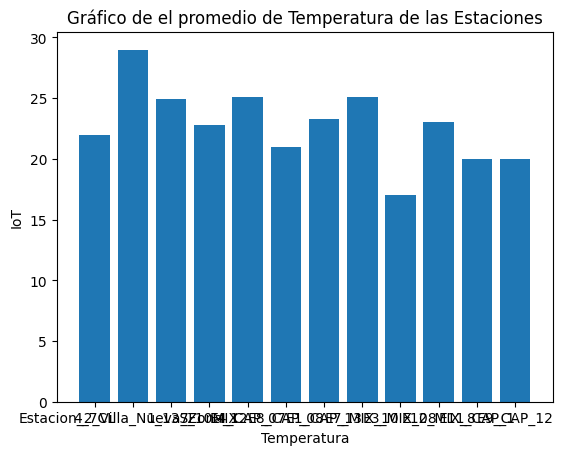

In [11]:
x = data_umes_2023['IoT']
y = data_umes_2023['Temperatura']
plt.bar(x,y)
plt.xlabel('Temperatura')
plt.ylabel('IoT')
plt.title('Gráfico de el promedio de Temperatura de las Estaciones')
plt.show()

9. Analisis de Datos "5 - Exportacion de Resultados": 
- Exportamos los Resultados de nuestro Analisis a un archivo con extension "CSV" desde pandas

In [12]:
meandategroupumes.to_csv('Resultados_data_UMES_2023.csv')

In [13]:
import folium
latlon = [ (14.571864, -90.563337), (14.609996, -90.529257), (14.594869, -90.576943), (14.611242,-90.572055), (14.618756,-90.538105), (14.564878,-90.531420), (14.593574, -90.596724)]
mapit = folium.Map( location=[15.019779, -90.468006], zoom_start=8 )
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit.save( 'map.html')

In [24]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import csv

def open_csv_file():
    file_path = filedialog.askopenfilename(title="Open CSV File", filetypes=[("CSV files", "*.csv")])
    if file_path:
        display_csv_data(file_path)

def display_csv_data(file_path):
    try:
        with open(file_path, 'r', newline='') as file:
            csv_reader = csv.reader(file)
            header = next(csv_reader)  # Lee la primera columna (IoT) en el TreeView
            tree.delete(*tree.get_children())  # Borra los datos que no tengan las condicionales en el TreeView

            filter_value = filter_combobox.get()
            if filter_value:  #Valor del Filtro (IoT)
                data = [row for row in csv_reader if row[0] == filter_value]
            else:
                data = list(csv_reader)

            tree["columns"] = header
            for col in header:
                tree.heading(col, text=col)
                tree.column(col, width=100)

            for row in data:
                tree.insert("", "end", values=row)

            status_label.config(text=f"CSV file loaded: {file_path}", fg="green")

    except Exception as e:
        status_label.config(text=f"Error: {str(e)}", fg="red")

root = tk.Tk()
root.title("CSV File Viewer")

# Estilo TreeView
style = ttk.Style()
style.configure("Treeview", background="#E1E1E1")
style.configure("Treeview.Heading", background="#555555", foreground="white")

open_button = tk.Button(root, text="Open CSV File", command=open_csv_file, padx=10, pady=5, bg="#4CAF50", fg="white")
open_button.pack(padx=20, pady=10)

tree = ttk.Treeview(root, show="headings")
tree.pack(padx=20, pady=20, fill="both", expand=True)

status_label = tk.Label(root, text="", padx=20, pady=10)
status_label.pack()

filter_combobox = ttk.Combobox(root, values=[""], state="readonly")
filter_combobox.set("") 
filter_combobox.pack(padx=5, pady=5, side="left")

root.mainloop()
